# Project 1: Samuel Kellum

## Part 1: Data Scraping and Preparation

#### Step 1: Scrape Your Competitor’s Data

The first thing to do is load the necessary libraries for Part 1 and some libraries I will probably need for Part 2.

In [1]:
# Load requests
import requests
# Load BeautiulSoup
from bs4 import BeautifulSoup
# Load Regular Expression Library
import re

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Load Pandas
import pandas as pd

To scrape a website, we first need to perform a successful GET request. Usually, the request is successful without the headers parameter, but it works with the User-Agent header parameter, and we know this because a 200 status code returns.

In [2]:
space_url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
#Learned to do this from https://stackoverflow.com/questions/27652543/how-to-use-python-requests-to-fake-a-browser-visit-a-k-a-and-generate-user-agent
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

r = requests.get(space_url, headers=headers)
#Checking the HTTP status code of the website we are trying to scrape
r.status_code

200

We need to make the HTML from the website readable to find the table we want to scrape, which we will turn into a DataFrame.

In [3]:
#Makes html easier to read
soup = BeautifulSoup(r.content, 'html.parser')
pretty = soup.prettify()
#Creates a list from the html page, the first of which will be the DataFrame we want to create
dfs = pd.read_html(pretty)
#Learned to do this from https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274
space_df = dfs[0]

After creating a raw DataFrame, we want to rename the columns and replace any empty values with NaN (not a number). Now we have a DataFrame with reasonable column names, but we can make the DataFrame significantly better by tidying the data.

In [4]:
#Renames columns
space_df = space_df.rename(columns={'Unnamed: 0' : 'rank', 'Unnamed: 1' : 'x_class', 'Unnamed: 2' : 'date', 'Region' : 'region', 'Start' : 'start_time', 'Maximum' : 'max_time', 'End' : 'end_time', 'Unnamed: 7' : 'movie'})
#There are not any cases where "-" appears in the DataFrame, so this line does nothing
space_df.replace('-',np.NaN)
space_df

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


#### Step 2: Tidy the Top 50 Solar Flare Data

To make the data tidy, we first want to delete the unnecessary movie column. Next, we want to combine the date and time columns to create a DateTime data type.

In [5]:
#Deletes movie column
del space_df['movie']

In [6]:
#Creates new datetime columns, with datetime data type created from date and times
#Learned to do this from here: https://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas
import datetime
space_df['start_datetime'] = pd.to_datetime(space_df['date'] + ' ' + space_df['start_time'])
space_df['max_datetime'] = pd.to_datetime(space_df['date'] + ' ' + space_df['max_time'])
space_df['end_datetime'] = pd.to_datetime(space_df['date'] + ' ' + space_df['end_time'])

Since we created new DateTime columns, we can delete the old data and time columns. The last thing we need to do to tidy this DataFrame is to rearrange the columns.

In [7]:
#Deleting unnecesary columns
del space_df['date']
del space_df['start_time']
del space_df['max_time']
del space_df['end_time']

In [8]:
#Rearranging columns
space_df = space_df[['rank','x_class','start_datetime','max_datetime','end_datetime','region']]

In [9]:
#The result of the above operations is a clean and tidy DataFrame
space_df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [10]:
space_df.dtypes

rank                       int64
x_class                   object
start_datetime    datetime64[ns]
max_datetime      datetime64[ns]
end_datetime      datetime64[ns]
region                     int64
dtype: object

#### Step 3: Scrape the NASA Data

Like the SpaceWeatherLive website, we first need to perform a GET request to scrape the website's data. Unlike the SpaceWeatherLive website, we do not need to use the header parameter to return a successful 200 HTTP code.

In [11]:
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
s = requests.get(nasa_url)
#Checking the HTTP status code of the website we are trying to scrape
s.status_code

200

Once again, similarly to the SpaceWeatherLive website, we want to make the website's HTML easier to read. In this case, we want to find the 'pre' tag, which contains the table we want to scrape. This website is more difficult to scrape since there are hyperlinks over every number in some columns. Like SpaceWeatherLive, the first element generated from using BeautifulSoup is what we want from the table.

In [12]:
#Makes html easier to read
nasa_soup = BeautifulSoup(s.content, 'html.parser')
#Creates list from html elements within the 'pre' tag
nasa_soup_list = nasa_soup.find_all('pre')
#The table we want to scrape is within the first element of this list
nasa_string = str(nasa_soup_list[0])

We want to create a python list, with each element representing a new line from the website. Each element in the list is a string. The table we want to scrape starts at index 12 in the full list, and it stops 522 elements (rows) later.

In [13]:
#Turns each newline into a list element
full_list = nasa_string.split('\n')
#Slicing list such that each table row is now a a list element in the form of a long string 
rows_list = full_list[12:12+522]

Now we want to create a new list within each element of the current list, where a new list element is created every time there is a space or tag symbol (< or >).

In [14]:
#Splitting each element into a nested list
split_list = []
for i in range(len(rows_list)):
    #Each <, >, or whitespace splits the elements into separate lists
    split_list.append(re.split("<|>| ",rows_list[i]))

The split function creates many elements in the nested list that we do not need, such as " ", "a", or "/a", and the elements starting with 'href.' By deleting these elements from the nested list, it will be much easier to convert the nested list into a DataFrame. Additionally, we will create elements that perfectly match with what we want to add into the DataFrame.

In [15]:
#Removes empty lists and html tags from the list
for i in range(len(split_list)):
    while "" in split_list[i]:
        split_list[i].remove("")
    while "a" in split_list[i]:
        split_list[i].remove("a")
    while "/a" in split_list[i]:
        split_list[i].remove("/a")
    #Learned to do this from https://stackoverflow.com/questions/7058679/remove-all-list-elements-starting-with-a-hash/7058690
    split_list[i] = [x for x in split_list[i] if not x.startswith('href')] 

We can insert the data into a DataFrame easily by creating python lists to represent each column. Now we can add the data from the nested list into clean lists representing each column for the DataFrame. 

In [16]:
#Each column of the DataFrame will be created with a list
cme_date = []
cme_time = []
cpa = []
end_date = []
end_frequency = []
end_time = []
flare_location = []
flare_region = []
importance = []
speed = []
start_date = []
start_frequency = []
start_time = []
width = []

In [17]:
#Adds data from nested list into new lists representing DataFrame columns
for i in range(len(split_list)):
    cme_date.append(split_list[i][9])
    cme_time.append(split_list[i][10])
    cpa.append(split_list[i][11])
    end_date.append(split_list[i][2])
    end_frequency.append(split_list[i][5])
    end_time.append(split_list[i][3])
    flare_location.append(split_list[i][6])
    flare_region.append(split_list[i][7])
    importance.append(split_list[i][8])
    speed.append(split_list[i][13])
    start_date.append(split_list[i][0])
    start_frequency.append(split_list[i][4])
    start_time.append(split_list[i][1])
    width.append(split_list[i][12])


With all the data compiled into lists, we are ready to create the DataFrame and create new columns consisting of data from each list.

In [18]:
#Creates empty DataFrame
nasa_df = pd.DataFrame()

#Creates new columns with each list
nasa_df['cme_date'] = cme_date
nasa_df['cme_time'] = cme_time
nasa_df['cpa'] = cpa
nasa_df['end_date'] = end_date
nasa_df['end_frequency'] = end_frequency
nasa_df['end_time'] = end_time
nasa_df['flare_location'] = flare_location
nasa_df['flare_region'] = flare_region
nasa_df['importance'] = importance
nasa_df['speed'] = speed
nasa_df['start_date'] = start_date
nasa_df['start_frequency'] = start_frequency
nasa_df['start_time'] = start_time
nasa_df['width'] = width


Similarly to the end of Step 1, we have a DataFrame with reasonable column names, but we have a lot of tidying to do if we want to analyze the data.

In [19]:
nasa_df

,cme_date,cme_time,cpa,end_date,end_frequency,end_time,flare_location,flare_region,importance,speed,start_date,start_frequency,start_time,width
0,04/01,15:18,74,04/01,4000,14:15,S25E16,8026,M1.3,312,1997/04/01,8000,14:00,79
1,04/07,14:27,Halo,04/07,1000,17:30,S28E19,8027,C6.8,878,1997/04/07,11000,14:30,360
2,05/12,05:30,Halo,05/14,80,16:00,N21W08,8038,C1.3,464,1997/05/12,12000,05:15,360
3,05/21,21:00,263,05/21,500,22:00,N05W12,8040,M1.3,296,1997/05/21,5000,20:20,165
4,09/23,22:02,133,09/23,2000,22:16,S29E25,8088,C1.4,712,1997/09/23,6000,21:53,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,09/17,12:00,Halo,09/17,900,12:35,S08E170,-----,----,1385,2017/09/17,16000,11:45,360
518,10/18,08:00,85,10/18,400,12:40,S06E123,-----,----,1001,2017/10/18,16000,05:48,146
519,05/03,23:24,90,05/04,2300,00:16,N12E82,12740,C1.0,692,2019/05/03,13000,23:52,113
520,11/29,13:25,Halo,11/29,850,15:23,S23E89,-----,M4.4,2077,2020/11/29,14000,13:07,360


#### Step 4: Tidy the NASA the Table

There are a lot of empty values to replace with NaN. Since each column uses different dashes, we can use a regular expression to replace any cell consisting only of dashes with a NaN. We can also replace DSF in the flare_region with FILA using the replace function.

In [20]:
#Replaces empty values with NaN (not a number)
nasa_df.replace('--/--', np.nan, inplace=True)
nasa_df.replace('--:--', np.nan, inplace=True)
nasa_df.replace(r'-+',np.nan, inplace=True,regex=True)
nasa_df.replace('????', np.nan, inplace=True)
#Replaces DSF occurances with FILA
nasa_df['flare_region'].replace('DSF', 'FILA', inplace=True)

The next thing to do is to create a new boolean column, with each row marked True if the cpa column for that row matches as "Halo", and False otherwise. Also, we need to replace each occurrence of 'Halo' with NaN so we can later convert the cpa column to a numerical data type.

In [21]:
#Creates new boolean is_flare column, with True values for rows with Halo cpa
nasa_df['is_flare'] = (nasa_df['cpa'] == 'Halo')
#Replaces Halo occurances with NaN
nasa_df['cpa'].replace('Halo', np.nan, inplace=True)

We also need to create a new column indicating whether the row contains a lower bound, meaning the cell starts with ">," or "\&gt"; in addition to removing the "\&gt;" from the number to, once again, allow us to convert the column into a numeric data type later. We also need to replace the NaN's in the new column, corresponding to rows with NaN widths, with False.

In [22]:
#Note: ">" is represented by "&gt;"
#Learned to do this from https://stackoverflow.com/questions/39299703/how-to-check-if-character-exists-in-dataframe-cell
nasa_df['width_lower_bound'] = nasa_df['width'].str.contains('&gt;')

#Remove ">" symbols from width column
nasa_df['width'] = nasa_df['width'].str.lstrip('&gt;')
#Replace NaN's in width_lower_bound column with False
nasa_df['width_lower_bound'].replace(np.nan,False, inplace=True)

To tidy the data, we again need to convert the dates and times into DateTime data types. We only have the start date in YYYY/MM/DD format, so we have to improvise and add the year (plus a /) to the beginning of the end_date and cme_dates. To make it a valid DateTime number, we also need to add ":00" to the end of the times. Also, we should convert 24:00 to 23:59, so the dates align.

In [23]:
#Convert times from 24:00 to 23:59
nasa_df.replace('24:00','23:59', inplace=True)

#Creates new datetime columns, with datetime data type created from start year, dates, and times
nasa_df['start_datetime'] = pd.to_datetime(nasa_df['start_date'] + ' ' + nasa_df['start_time'] + ':00')
nasa_df['end_datetime'] = pd.to_datetime(nasa_df['start_date'].str[0:4] + '/' + nasa_df['end_date'] + ' ' + nasa_df['end_time'] + ':00')
nasa_df['cme_datetime'] = pd.to_datetime(nasa_df['start_date'].str[0:4] + '/' + nasa_df['cme_date'] + ' ' + nasa_df['cme_time'])

For some reason, one of the cells had the value "360h" when it should be "360." Looking at the rest of the data, we can reasonably assume it was a typo. Luckily, we can replace that value with the correct number. Once again, we should rearrange the columns to display only the ones we need.

In [24]:
#Replace 360h with 360 which is in one of the rows for some reason
nasa_df.replace("360h","360", inplace=True)
#Rearrange columns
nasa_df = nasa_df[['start_datetime','end_datetime','start_frequency','end_frequency','flare_location','flare_region','importance','cme_datetime','cpa','width','speed','is_flare','width_lower_bound']]

There was an issue when using the to_numeric method. A SettingWithCopyWarning warning appeared whenever I tried to store it to a new value. Looking at the documentation, none of the correct examples involved the to_numeric method or even setting a column to a new value. On the other hand, when just doing pd.to_numeric(df['column']), the output would appear as a numeric type but immediately revert to object type. After spending way too much research on the issue, it seems that this is a bug in pandas. Nonetheless, we can ignore the warning to change the necessary columns from an object to a numeric data type. 


In [25]:
#Ignores warning that is created when I try to change a column from object to numeric type
import warnings
warnings.filterwarnings('ignore')
#Change data types from object to numeric
nasa_df['start_frequency'] = pd.to_numeric(nasa_df['start_frequency'])
nasa_df['end_frequency'] = pd.to_numeric(nasa_df['start_frequency'])
nasa_df['cpa'] = pd.to_numeric(nasa_df['cpa'])
nasa_df['width'] = pd.to_numeric(nasa_df['width'])
nasa_df['speed'] = pd.to_numeric(nasa_df['speed'])


Now we have a tidy DataFrame with each column containing the correct data type, and we can conduct a proper analysis of the DataFrame.

In [26]:
#The result of the above operations is a clean and tidy DataFrame with the correct data types for each column
nasa_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,8000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,11000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,12000.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,5000.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,6000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000.0,16000.0,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360.0,1385.0,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000.0,16000.0,S06E123,NaN,NaN,2017-10-18 08:00:00,85.0,146.0,1001.0,False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000.0,13000.0,N12E82,12740,C1.0,2019-05-03 23:24:00,90.0,113.0,692.0,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000.0,14000.0,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360.0,2077.0,True,False


In [27]:
nasa_df.dtypes

start_datetime       datetime64[ns]
end_datetime         datetime64[ns]
start_frequency             float64
end_frequency               float64
flare_location               object
flare_region                 object
importance                   object
cme_datetime         datetime64[ns]
cpa                         float64
width                       float64
speed                       float64
is_flare                       bool
width_lower_bound              bool
dtype: object

## Part 2: Analysis

#### Question 1: Replication

Now that we have a tidy DataFrame from the NASA website, we want to see if we can replicate the top 50 solar flares that we scraped from the SpaceWeatherLive website.

Since all 50 solar flares from the SpaceWeatherLive website are in the X class of importance, we should filter out any solar flare that is not in the X class.

In [28]:
#Creates new boolean column, with True values for rows in importance column with X-class importance
nasa_df['X_importance'] = nasa_df['importance'].str.match(r'X+')

In order to properly compare importance values within the X-importance group, we should create a new DataFrame consisting only of rows with X importance.

In [29]:
#Creates new dataframe from rows with X-class importance
important_df = nasa_df[nasa_df['X_importance'] == True]

In order to quantitatively compare the values, we need to create a new column with the number that follows the X in the importance column. We can do that by converting the value to a string, and getting rid of the first character, which is the "X".

Once again, we can convert the value into a numeric type in order to compare the importance of each flare.

In [30]:
#Creates new column with just the number that follows the "X"
important_df['num_importance'] = important_df['importance'].str[1:]
#Change data type from object to numeric
important_df['num_importance'] = pd.to_numeric(important_df['num_importance'])

As we can see below, when the values are sorted in descending order, with the 50th value equal to 1.9 and the 51st value equal to 1.8.

In [31]:
important_df['num_importance'].sort_values(ascending=False).head(51)

240    28.0
117    20.0
233    17.0
126    14.0
234    10.0
8       9.4
514     9.3
328     9.0
237     8.3
515     8.3
288     7.1
359     6.9
331     6.5
317     6.2
82      5.7
121     5.6
375     5.4
135     5.3
443     4.9
193     4.8
104     4.0
239     3.9
286     3.8
222     3.6
160     3.4
332     3.4
192     3.3
404     3.2
201     3.1
403     2.8
19      2.7
487     2.7
238     2.7
142     2.6
9       2.6
284     2.6
276     2.5
123     2.3
99      2.3
73      2.3
345     2.2
7       2.1
318     2.1
420     2.1
361     2.1
274     2.0
98      2.0
125     2.0
285     2.0
102     1.9
100     1.8
Name: num_importance, dtype: float64

To most accurately replicate the SpaceWeatherLive dataframe, we should create a new dataframe consisting only of the top 50 most important flares from the NASA website.

We can do that by creating a boolean column indicating whether the importance value is greater than or equal to 1.9, and creating a new dataframe consisting of those values.

In [32]:
#Creates new boolean column, with True values for rows with a number greater than 1.9.
important_df['top50'] = important_df['num_importance'] >= 1.9

In [33]:
top50_df = important_df[important_df['top50'] == True]
top50_df = top50_df.sort_values('num_importance', ascending=False)

When comparing the top50 DataFrame created from the NASA website with the SpaceWeatherLive DataFrame, you will notice that although many of the same solar flares appear on both DataFrames, they do not match perfectly.

For example, the start DateTime of the flares with the same importance (or x_class) differ by anywhere from a few minutes to a couple of hours.

Additionally, the 50th most important solar flare from the NASA website has a value of X1.9, compared to X2.6 from the SpaceWeatherLive website.

If we were to look through each DataFrame below, we would find that about half of the top 50 solar flares would find a reasonable match, indicating that it is the same event. We will explore this in the next question.

In [34]:
top50_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound,X_importance,num_importance,top50
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,10000.0,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False,True,28.0,True
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,14000.0,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False,True,20.0,True
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,14000.0,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False,True,17.0,True
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,14000.0,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False,True,14.0,True
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,11000.0,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False,True,10.0,True
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,14000.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False,True,9.4,True
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,16000.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,True,False,True,9.3,True
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,14000.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,True,9.0,True
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,16000.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,True,False,True,8.3,True
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,12000.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,True,False,True,8.3,True


In [35]:
space_df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


#### Question 2: Integration


To compare the space DataFrame with the NASA DataFrame, we should once again convert the x_class importance into a numeric value that we can operate on.

For this DataFrame, we need to change non-numeric values such as 28+ into 28.0 to properly operate on the values. We could use a regular expression, but since the plus sign is a regex operator, it is easier to just manually change the four values.

In [36]:
#Creates new column with just the number that follows the "X"
space_df['num_importance'] = space_df['x_class'].str[1:]

#Change numbers ending with a + to numeric
space_df['num_importance'][0] = 28.0
space_df['num_importance'][1] = 20.0
space_df['num_importance'][2] = 17.2
space_df['num_importance'][3] = 17.0

#Change data type from object to numeric
space_df['num_importance'] = pd.to_numeric(space_df['num_importance'])

In [37]:
#Creates empty row of NaN values
nasa_df['num_X_importance'] = np.NaN

#Change num_X_importance to the number after the X but only if the flare is in the X class
#Learned to do this from https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column
nasa_df.loc[nasa_df['X_importance'] == True, 'num_X_importance'] = nasa_df['importance'].str[1:]

#Change data type from object to numeric
nasa_df['num_X_importance'] = pd.to_numeric(nasa_df['num_X_importance'])

Now we need to figure out how to find the closest match between a row in the SpaceWeatherLive DataFrame and the NASA DataFrame. There are many possible answers, but I think the most effective solution would be to find a row with the most similar time and importance value.

To do this, we need to create two functions: both functions will return an index from the NASA DataFrame that most closesly matches the index from the SpaceWeatherLive DataFrame.

This function returns the index of the closest start time from the NASA DataFrame given an index from the SpaceWeatherLive DataFrame.

In [38]:
def closest_time(index):
    #Learned to do this from https://numpy.org/doc/stable/reference/arrays.datetime.html
    return abs(space_df['start_datetime'][index] - nasa_df['start_datetime']).sort_values()[0:1].index[0]

For example, the closest start time to the 0th index in the SpaceWeatherLive DataFrame is the 240th index in the NASA DataFrame.

In [39]:
closest_time(0)

240

This function returns the index of the closest importance to the NASA DataFrame given an index from the SpaceWeatherLive DataFrame.

In [40]:
def closest_importance(index):
    return abs(space_df['num_importance'][index] - nasa_df['num_X_importance']).sort_values()[0:1].index[0]

For example, the closest start time to the 0th index in the SpaceWeatherLive DataFrame is the 240th index in the NASA DataFrame.

In [41]:
closest_importance(0)

240

Since both the closest time and importance from the 0th index from the SpaceWeatherLive DataFrame match to the 240th index in the NASA DataFrame, the 240th index is the best match.

As we can see below, these two rows correspond the the same SolarFrame. For example, the start and end times are on the same day, the regions both end in "486," and the X_class (or importance) correspond.

In [42]:
space_df.loc[0]

rank                                1
x_class                          X28+
start_datetime    2003-11-04 19:29:00
max_datetime      2003-11-04 19:53:00
end_datetime      2003-11-04 20:06:00
region                            486
num_importance                     28
Name: 0, dtype: object

In [43]:
nasa_df.loc[240]

start_datetime       2003-11-04 20:00:00
end_datetime         2003-11-04 23:59:00
start_frequency                    10000
end_frequency                      10000
flare_location                    S19W83
flare_region                       10486
importance                          X28.
cme_datetime         2003-11-04 19:54:00
cpa                                  NaN
width                                360
speed                               2657
is_flare                            True
width_lower_bound                  False
X_importance                        True
num_X_importance                      28
Name: 240, dtype: object

Now we can apply this function to all 50 rows from the SpaceWeatherLive DataFrame. If the closest time and closest importance from the SpaceWeatherLive DataFrame match to the same index in the NASA DataFrame, we should add the rank from the SpaceWeatherLive DataFrame to the NASA DataFrame.

It is important to note that not all 50 ranks from SpaceWeatherLive DataFrame will appear on the NASA DataFrame, since not every rank will have a match.

In [44]:
#Create new rank column, fill with NAN values
nasa_df['rank'] = np.NaN 

#For each row in the SpaceWeatherLive DataFrame, check for the best match 
for i in range(len(space_df)):
    #If there is a match, apply that rank (row + 1) to the NASA DataFrame
    if closest_time(i) == closest_importance(i):
        nasa_df.loc[closest_importance(i), "rank"] = i + 1

Now that we have ranked values for the best matches, we should create a new DataFrame consisting only of solar flares we found in the NASA DataFrame from the SpaceWeatherLive DataFrame.

We found 29 matches out of the 50 rows in the SpaceWeatherLive DataFrame.

In [45]:
rank_df = nasa_df[nasa_df['rank'].notnull()].sort_values(by=['rank'])
rank_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound,X_importance,num_X_importance,rank
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,10000.0,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False,True,28.0,1.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,14000.0,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False,True,20.0,2.0
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,14000.0,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False,True,17.0,3.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,14000.0,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False,True,14.0,5.0
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,11000.0,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False,True,10.0,6.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,14000.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False,True,9.4,7.0
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,16000.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,True,False,True,9.3,8.0
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,14000.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,True,9.0,9.0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,16000.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,True,False,True,8.3,11.0
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000.0,14000.0,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360.0,882.0,True,False,True,7.1,12.0


#### Question 3: Analysis Plot

Now we can conduct some analysis comparing the flares we found ranked values from to the entire NASA DataFrame.

The blue dots represent all solar flares, with orange dots representing the ranked solar flares we found in the previous step.

The intention of this scatterplot is to compare the Ending Frequency to the CME Speed of each flare.

We can tell though that the ranked solar flares have a higher CME Speed on average. The average speed of all of the NASA solar flares is 1165 km/s, but the ranked solar flares have an average speed of 1882 km/s. Additionally, the ranked solar flares have a higher ending frequency (12379 kHz) than all of the NASA solar flares (10745 kHz).

As we can see below, there is almost zero correlation between Ending Frequency and CME Speed for both the ranked and unranked solar flares.


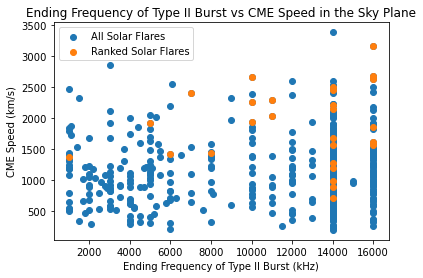

In [46]:
plt.scatter(nasa_df['end_frequency'],nasa_df['speed'], label='All Solar Flares')
plt.scatter(rank_df['end_frequency'], rank_df['speed'], label="Ranked Solar Flares")
plt.title('Ending Frequency of Type II Burst vs CME Speed in the Sky Plane')
plt.xlabel('Ending Frequency of Type II Burst (kHz)')
plt.ylabel('CME Speed (km/s)')
plt.legend(loc="upper left")
plt.show()

In [47]:
nasa_df['speed'].mean(), rank_df['speed'].mean()

(1164.894, 1881.8148148148148)

In [48]:
nasa_df['end_frequency'].mean(), rank_df['end_frequency'].mean()

(10744.69111969112, 12379.310344827587)

In [49]:
nasa_df['speed'].corr(nasa_df['end_frequency']), rank_df['speed'].corr(rank_df['end_frequency'])

(0.07547378753473395, 0.11257936197577223)

In the next plot, the intention of this pie chart was to compare the proportion of Halo CMEs between all of the NASA solar flares and the ranked solar flares.

As we can see below, ranked solar flares have a higher probability of being Halo CMEs than all of the NASA solar flares. 55 percent of the NASA solar flares were Halo CMEs, but 83 percent of the ranked solar flares were Halo CMEs.

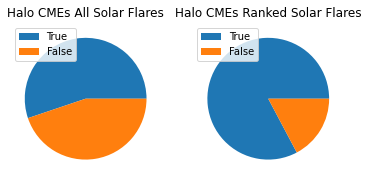

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)
labels = ['True', 'False']
ax1.pie(nasa_df['is_flare'].value_counts())
ax2.pie(rank_df['is_flare'].value_counts())
ax1.legend(labels, loc='upper left')
ax2.legend(labels, loc='upper left')
ax1.title.set_text('Halo CMEs All Solar Flares')
ax2.title.set_text('Halo CMEs Ranked Solar Flares')
plt.show()

In [51]:
nasa_df['is_flare'].sum() / len(nasa_df) , rank_df['is_flare'].sum() / len(rank_df)

(0.5517241379310345, 0.8275862068965517)

In the third and final plot, the intention was to detect if there was a cluster of flares in any particular month.

The graph shows that the flares occur pretty inconsistently, with some months having 13 flares but some months having 0 or 1 flares (the describe function omits months with zero flares).

In the DataFrame consisting of only ranked values, we could only rank 29 flares, which occured in 21 separate months. However, we see 3 ranked flares occuring in one month, but zero ranked flares occuring in most months.

<AxesSubplot:title={'center':'Number of Flares Per Month All Solar Flares'}, xlabel='Year and Month (YYYY, M)', ylabel='Number of Flares'>

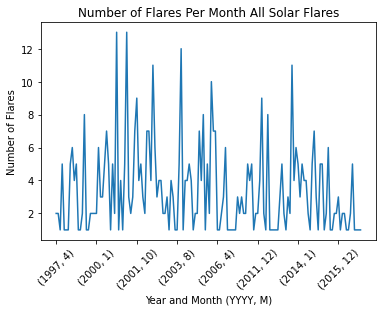

In [52]:
#Learned to do the groupby from here: https://newbedev.com/how-can-i-group-by-month-from-a-date-field-using-python-pandas
nasa_df['start_datetime'].groupby([nasa_df['start_datetime'].dt.year, nasa_df['start_datetime'].dt.month]).agg('count').plot(rot=45,title="Number of Flares Per Month All Solar Flares", xlabel='Year and Month (YYYY, M)', ylabel = "Number of Flares")

<AxesSubplot:title={'center':'Number of Flares Per Month Ranked Solar Flares'}, xlabel='Year and Month (YYYY, M)', ylabel='Number of Flares'>

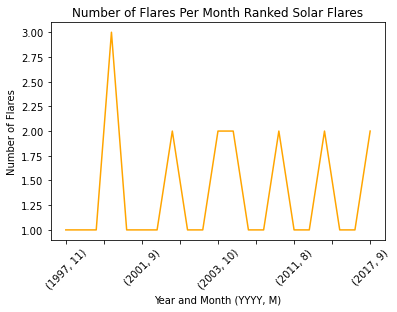

In [53]:
rank_df['start_datetime'].groupby([rank_df['start_datetime'].dt.year, rank_df['start_datetime'].dt.month]).agg('count').plot(rot=45,color='orange',title='Number of Flares Per Month Ranked Solar Flares', xlabel='Year and Month (YYYY, M)', ylabel = "Number of Flares")

In [54]:
nasa_df['start_datetime'].groupby([nasa_df['start_datetime'].dt.year, nasa_df['start_datetime'].dt.month]).agg('count').describe(), nasa_df['start_datetime'].groupby([rank_df['start_datetime'].dt.year, rank_df['start_datetime'].dt.month]).agg('count').describe(), 

(count    152.000000
 mean       3.434211
 std        2.651180
 min        1.000000
 25%        1.000000
 50%        3.000000
 75%        5.000000
 max       13.000000
 Name: start_datetime, dtype: float64,
 count    21.000000
 mean      1.380952
 std       0.589592
 min       1.000000
 25%       1.000000
 50%       1.000000
 75%       2.000000
 max       3.000000
 Name: start_datetime, dtype: float64)